### Binary classification using Keras.

Use the IMDB dataset of 50000 reviews (25k positive, 25k negative) to build Neural network.
Data has been preprocessed - the words have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

In [0]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #keep only 10k most frequently occuring words

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


To decode reviews back to English use the following. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

1646592/1641221 [==============================] - 2s 1us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

Use one hot encoding to prepare the data so that all samples have same length. Vectorize labels by converting them to numpy array

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
    
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Create validation set

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Define the network

In [0]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


Choose the loss function and an optimizer and fit the model to partial training data

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.5087 - acc: 0.7813 - val_loss: 0.3799 - val_acc: 0.8691
Epoch 2/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.3007 - acc: 0.9051 - val_loss: 0.3007 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.2181 - acc: 0.9283 - val_loss: 0.3089 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1751 - acc: 0.9433 - val_loss: 0.2839 - val_acc: 0.8836
Epoch 5/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1426 - acc: 0.9541 - val_loss: 0.2847 - val_acc: 0.8866
Epoch 6/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1150 - acc: 0.9653 - val_loss: 0.3153 - val_acc: 0.8775
Epoch 7/20
15000/15000 [==============================] - 2s 124us/step - 

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Plotting the training & validation loss

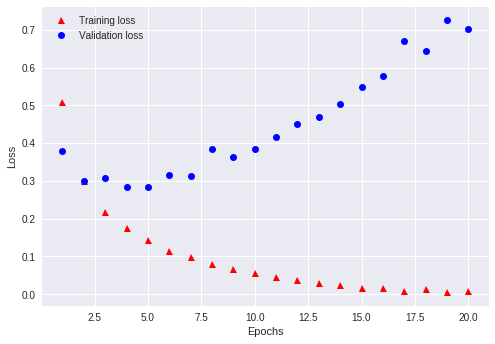

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'r^',label='Training loss')
plt.plot(epochs,val_loss_values,'bo',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot the training and validation accuracy


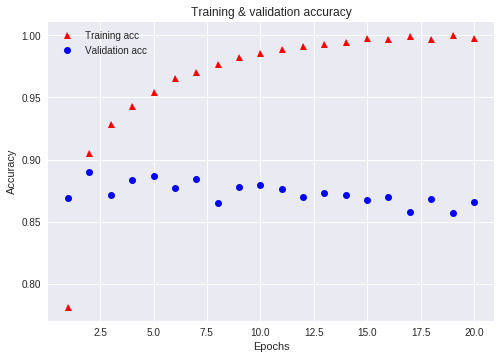

In [0]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs,acc_values,'r^',label='Training acc')
plt.plot(epochs,val_acc_values,'bo',label='Validation acc')
plt.title('Training & validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The training loss decreases with every epoch, and the training accuracy increases with every epoch. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. So the model is Overffiting. Lets tackle this by - 
 - Reducing the number of epochs
 - Reducing size of the network
 - Using regularization - weight or dropout

Instead of 20 epochs which causes overfitting train a new model from scratch for only 4 epochs. 

In [0]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test,y_test)
print (model.metrics_names[0]+"  - " + str(results[0]))
print (model.metrics_names[1]+"  - " + str(results[1]))

Epoch 1/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.4489 - acc: 0.8252
Epoch 2/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.2604 - acc: 0.9113
Epoch 3/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.2000 - acc: 0.9286
Epoch 4/4
25000/25000 [==============================] - 2s 72us/step
loss  - 0.2936700465774536
acc  - 0.88476


This fairly naive approach of training for fewer epochs achieves an accuracy of ~88%.

---


Lets try to replace it with a smaller network and train for 20 epochs instead of 4

In [0]:
model = models.Sequential()
model.add(layers.Dense(4,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history_small = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.5942 - acc: 0.7681 - val_loss: 0.5234 - val_acc: 0.8178
Epoch 2/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.4544 - acc: 0.8731 - val_loss: 0.4239 - val_acc: 0.8652
Epoch 3/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.3641 - acc: 0.8959 - val_loss: 0.3635 - val_acc: 0.8764
Epoch 4/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.3003 - acc: 0.9097 - val_loss: 0.3247 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.2545 - acc: 0.9217 - val_loss: 0.2988 - val_acc: 0.8881
Epoch 6/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.2201 - acc: 0.9329 - val_loss: 0.2882 - val_acc: 0.8874
Epoch 7/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1934 - acc: 0.9394 - val_loss: 0.2928 - 

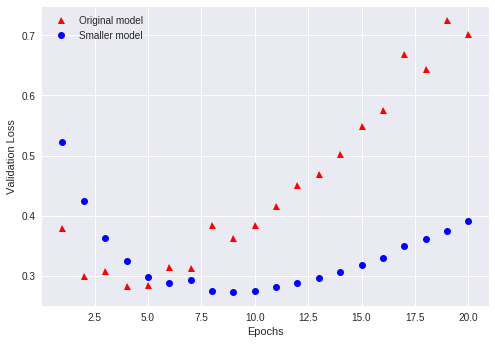

In [0]:
val_loss_small = history_small.history['val_loss']

epochs = range(1,len(val_loss_small)+1)

plt.plot(epochs,val_loss_values,'r^',label='Original model')
plt.plot(epochs,val_loss_small,'bo',label='Smaller model ')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

The smaller network starts overfitting later than the original reference network (at 6 v/s 4). 


### Regularization

Let's try Weight regularization for our original network - put constraints on the complexity of a network by forcing its weights to take only small values. 

We use L2 regularizer with 0.001, so every coefficient in the weight matrix of the layer will add (0.001 *
weight_coefficient_value) to the total loss of the network 

In [0]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.001),
                      input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history_reg = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 199us/step - loss: 0.5890 - acc: 0.7775 - val_loss: 0.4660 - val_acc: 0.8640
Epoch 2/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.3975 - acc: 0.8925 - val_loss: 0.3793 - val_acc: 0.8852
Epoch 3/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.3146 - acc: 0.9178 - val_loss: 0.3437 - val_acc: 0.8885
Epoch 4/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.2742 - acc: 0.9277 - val_loss: 0.3424 - val_acc: 0.8827
Epoch 5/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.2500 - acc: 0.9355 - val_loss: 0.3349 - val_acc: 0.8866
Epoch 6/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.2294 - acc: 0.9451 - val_loss: 0.3326 - val_acc: 0.8860
Epoch 7/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.2178 - acc: 0.9495 - val_loss: 0.3656 - 

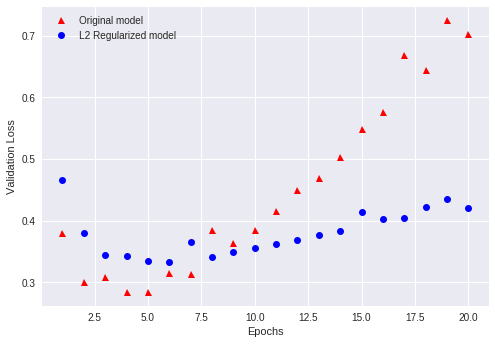

In [0]:
val_loss_reg = history_reg.history['val_loss']

epochs = range(1,len(val_loss_reg)+1)

plt.plot(epochs,val_loss_values,'r^',label='Original model')
plt.plot(epochs,val_loss_reg,'bo',label='L2 Regularized model ')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

Let's try Dropout regularization

In [0]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

history_dropout = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 345us/step - loss: 0.6636 - acc: 0.5836 - val_loss: 0.5788 - val_acc: 0.7742
Epoch 2/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.5621 - acc: 0.7202 - val_loss: 0.4536 - val_acc: 0.8516
Epoch 3/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.4664 - acc: 0.7998 - val_loss: 0.3668 - val_acc: 0.8757
Epoch 4/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.3893 - acc: 0.8440 - val_loss: 0.3229 - val_acc: 0.8870
Epoch 5/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.3362 - acc: 0.8742 - val_loss: 0.2872 - val_acc: 0.8899
Epoch 6/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.2970 - acc: 0.8919 - val_loss: 0.2762 - val_acc: 0.8917
Epoch 7

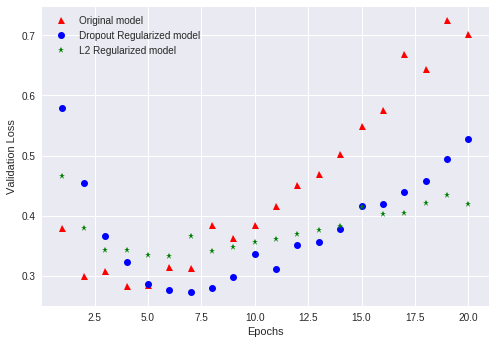

In [0]:
val_loss_dropout = history_dropout.history['val_loss']

epochs = range(1,len(val_loss_reg)+1)

plt.plot(epochs,val_loss_values,'r^',label='Original model')
plt.plot(epochs,val_loss_dropout,'bo',label='Dropout Regularized model')
plt.plot(epochs,val_loss_reg,'g*',label='L2 Regularized model ')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

Further Experiments


*   Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
* Try using the mse loss function instead of binary_crossentropy.
* Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.